# Calculate $\beta_c$

Given network,  
1. bond percolation
2. get the two largest strongly connected components and their "sout" components
3. calculate four quantities
    - $s_{out}^{1st}$($s_{out}^{\infty}$)
    - std($s_{out}^{\infty}$)/$s_{out}^{\infty}$

In [1]:
WORKSPACEFOLDER = 'E:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [6]:
import json

import numpy as np

import src.main.model.network as network
import src.main.util.network.algorithm as algorithm

In [28]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [12]:
def main():
    # g_name, betas, times
    with open(f'db/{g_name}/at.json', 'r') as fr:
        at = json.load(fr)
    g = network.DirectedGraph(g_name, at)
    gout_mean, gout_std = [], []
    for beta in betas:
        print(f'{beta:.4f},', end='\t')
        gout_szs = []
        for t in range(times):
            sub_at = g.n_bond_percolation(beta)
            gout = algorithm.Algorithm.get_gout(sub_at)
            gout_szs.append(len(gout))
        gout_szs = np.array(gout_szs)
        gout_mean.append(gout_szs.mean())
        gout_std.append(gout_szs.std())
    return gout_mean, gout_std

## DiSFNetwork4

beta_c = 0.0200

In [44]:
g_name, times = 'DiSF_a', 100
betas = (np.arange(100) + 1) * (0.1 / 100)

In [37]:
gout_mean, gout_std = main()

0.0010,	0.0020,	0.0030,	0.0040,	0.0050,	0.0060,	0.0070,	0.0080,	0.0090,	0.0100,	0.0110,	0.0120,	0.0130,	0.0140,	0.0150,	0.0160,	0.0170,	0.0180,	0.0190,	0.0200,	0.0210,	0.0220,	0.0230,	0.0240,	0.0250,	0.0260,	0.0270,	0.0280,	0.0290,	0.0300,	0.0310,	0.0320,	0.0330,	0.0340,	0.0350,	0.0360,	0.0370,	0.0380,	0.0390,	0.0400,	0.0410,	0.0420,	0.0430,	0.0440,	0.0450,	0.0460,	0.0470,	0.0480,	0.0490,	0.0500,	0.0510,	0.0520,	0.0530,	0.0540,	0.0550,	0.0560,	0.0570,	0.0580,	0.0590,	0.0600,	0.0610,	0.0620,	0.0630,	0.0640,	0.0650,	0.0660,	0.0670,	0.0680,	0.0690,	0.0700,	0.0710,	0.0720,	0.0730,	0.0740,	0.0750,	0.0760,	0.0770,	0.0780,	0.0790,	0.0800,	0.0810,	0.0820,	0.0830,	0.0840,	0.0850,	0.0860,	0.0870,	0.0880,	0.0890,	0.0900,	0.0910,	0.0920,	0.0930,	0.0940,	0.0950,	0.0960,	0.0970,	0.0980,	0.0990,	0.1000,	

In [47]:
x = [float(_) for _ in betas]
y1 = [float(_) for _ in np.array(gout_mean) / 10000]
y2 = [float(_) for _ in np.array(gout_std) / np.array(gout_mean)]

In [53]:
data = {
    'x': x,
    'y1': y1,
    'y2': y2
}
with open(r'db\DiSF_a\img\critical_beta.json', 'w') as fw:
    json.dump(data, fw)

<IPython.core.display.Javascript object>


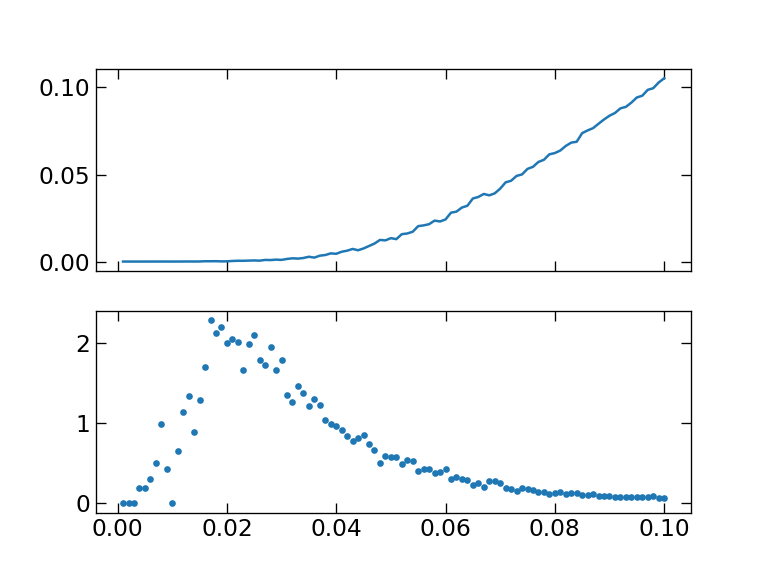

In [52]:
fig, ax = plt.subplots(2, 1, sharex=True)
for i in range(len(ax)):
    ax[i].tick_params(which='both', direction='in', bottom=True, top=True, left=True, right=True)
    ax[i].tick_params(labelsize=14, length=6)
ax[0].plot(x, y1)
ax[1].plot(x, y2, '.')

## DiSFNetwork20

beta_c = 0.005

In [54]:
g_name, times = 'DiSF_b', 100
betas = (np.arange(100) + 1) * (0.02 / 100)

In [21]:
gout_mean, gout_std = main()

0.0010,	0.0020,	0.0030,	0.0040,	0.0050,	0.0060,	0.0070,	0.0080,	0.0090,	0.0100,	

<IPython.core.display.Javascript object>


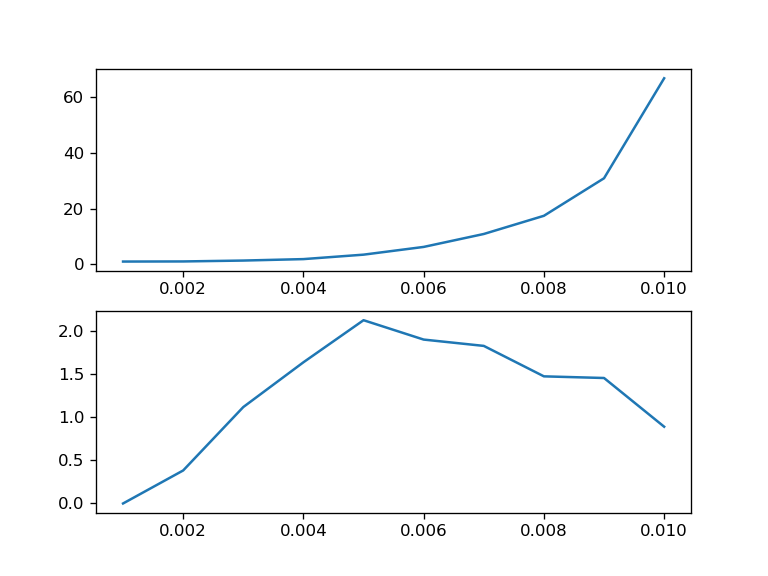

In [22]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(betas, gout_mean)
ax[1].plot(betas, np.array(gout_std) / np.array(gout_mean))

## SNAPTwitter

beta_c = 0.004

In [23]:
g_name, times = 'SNAPTwitter', 100
betas = (np.arange(10) + 3) * 0.0010

In [25]:
gout_mean, gout_std = main()

0.0030,	0.0040,	0.0050,	0.0060,	0.0070,	0.0080,	0.0090,	0.0100,	0.0110,	0.0120,	

<IPython.core.display.Javascript object>


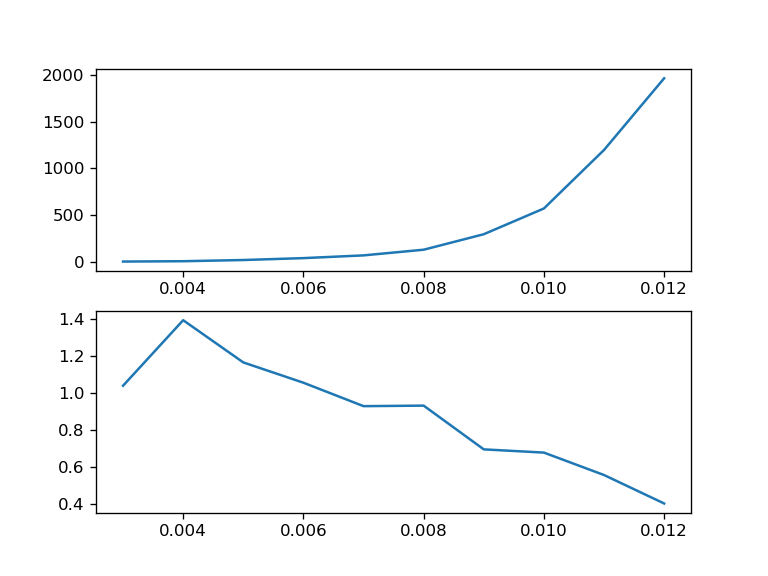

In [26]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(betas, gout_mean)
ax[1].plot(betas, np.array(gout_std) / np.array(gout_mean))